## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering (Solutions)

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.

In [1]:
import pandas as pd
df = pd.read_csv('./data/car_data.csv')
print(df.columns)
df.head()

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchased`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchased`.

In [2]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [3]:
df['Gender'].value_counts()

Gender
Female    516
Male      484
Name: count, dtype: int64

> There aren't any missing values. 

In [4]:
df['g'] = 0 # I'll call the dummy variable version just "g" and keep the original "Gender" variable
df.loc[ df['Gender']== 'Female', 'g'] = 1
df['g'].value_counts()

g
1    516
0    484
Name: count, dtype: int64

In [5]:
vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.

In [6]:
def maxmin(x): # Maxmin normalization function
    x = (x-min(x))/(max(x)-min(x))
    return x

X = X.apply(maxmin) # Apply maxmin normalization function to all columns of X

X.describe() 

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


4. Split the sample into a ~80% training dataset and a ~20% testing dataset.

In [7]:
# We can use sklearn to do this:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=101)

5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.

[9]


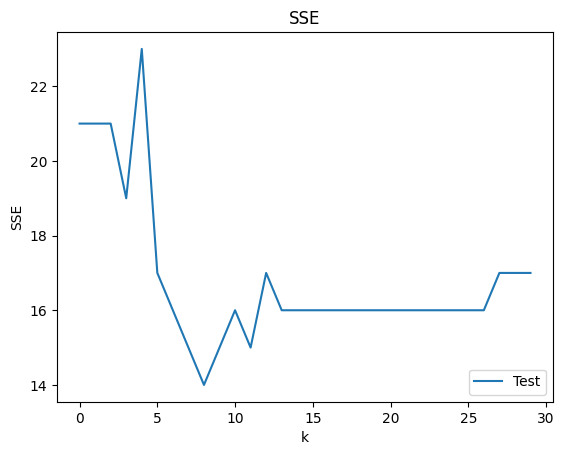

In [8]:
# Import the classifier module:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Import the kNN classifier tool

# Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

> Looks like the optimal k is around 9. As we move forward, we'll talk about better ways to pick and calibrate classifier models, but at this point this is an OK approach.

6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

In [9]:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,120,8
1,6,66


> The vast majority of cases are predicted correctly: 0's go to 0's and 1's go to 1's. There's 8 times where 0 is classified as a 1 and 6 times where 1 is classified as a zero, but this is 13/200=.07 proportion of cases. The overall accuracy is 186/200=.93 proportion of cases.

7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [10]:
from sklearn.model_selection import train_test_split

vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=101)

model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for test set

y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']


In [11]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,51,15
1,10,28


In [12]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,58,4
1,12,22


> 

> For men, about 80/96 = .8333 are correct, while for women, about 79/104 = .7596. It seems like the model does a better job predicting what a male customer will do, rather than a female customer. 

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]
print(df.shape)
df.head()

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [14]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


> There are no `nan`s, since there are 2499 observations of each variable, and 2499 rows in the dataset.

2. Maxmin normalize `year` and `mileage`.

In [15]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

3. Split the sample into ~80% for training and ~20% for evaluation.

In [16]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

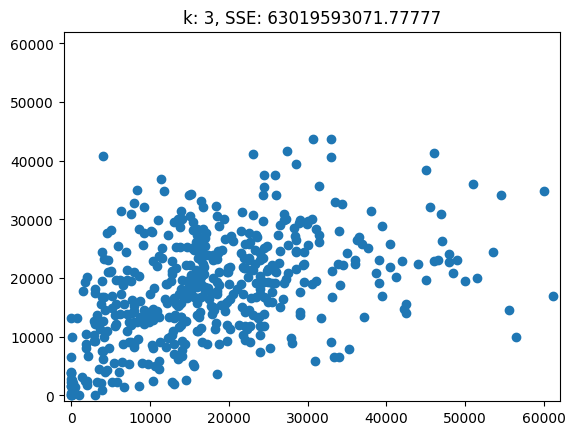

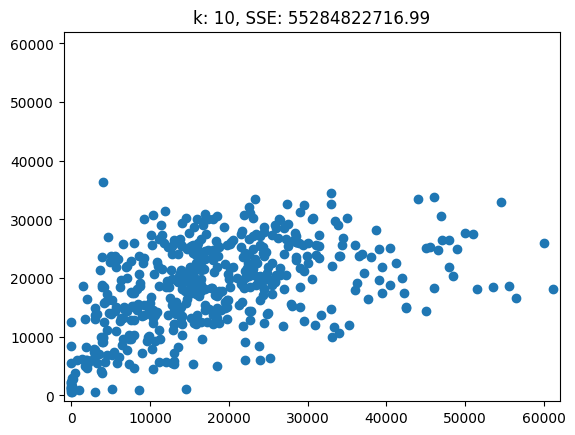

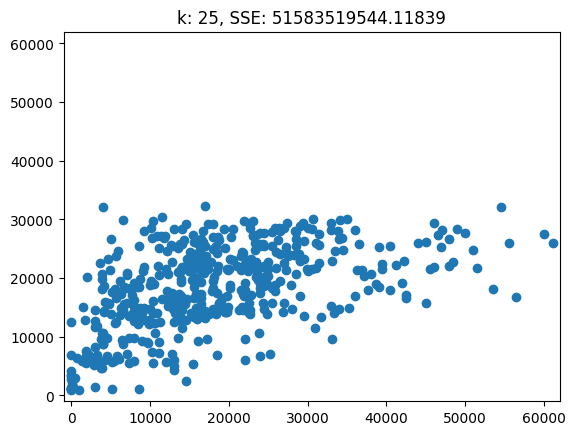

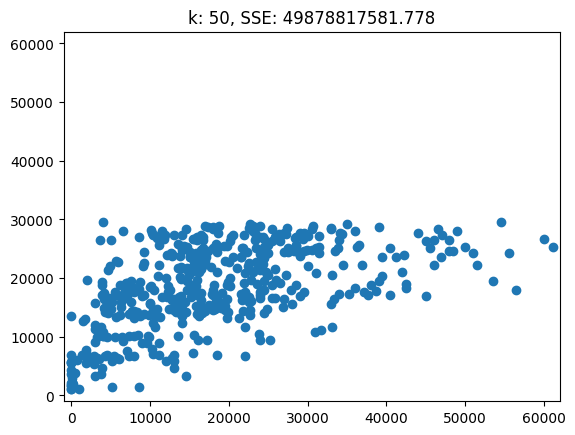

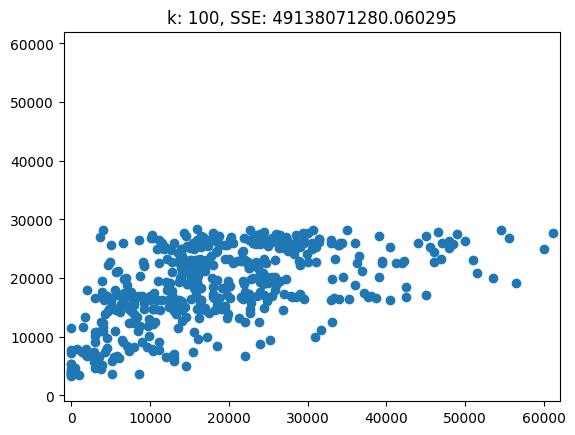

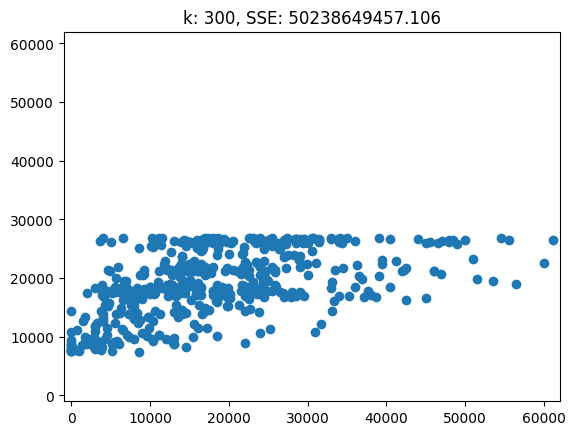

In [17]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    #
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()


5. Determine the optimal $k$ for these data.

[77]


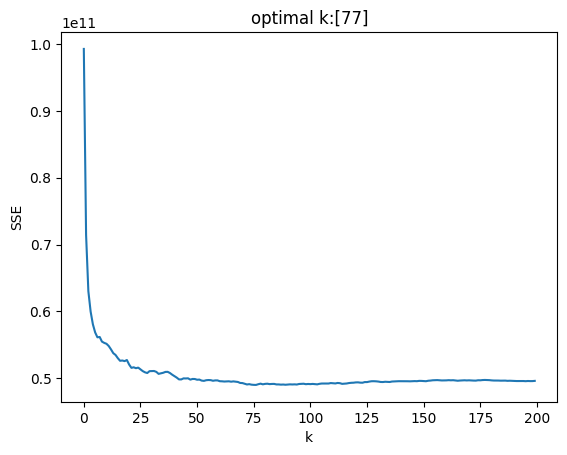

In [18]:
# Determine the optimal k:
k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
 
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

> The optimal $k$ is around 77, so for 300, the model is probably overfitting, and for 3, 10, and 25, the model is underfitting. For $k$ equal to 50 and 100, the answer is pretty close. What do we notice about $k=300$? There is a bunch of horizontal bunching, where common answers start to exert a lot of influence on the predictions and organize them into horizontal groups. Since the data are fairly evenly distributed, this is an unnatural artifact of over-fitting. On the other hand, for very small $k$, like 3, the predictions are high variance and low precision.
> The other thing to notice is that as $k$ increases, the range of predictions shrinks: The high, outlier values become less influential, and predictions shrink towards average values. 

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')

print(df.shape)

df.describe()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


> No missing values, since 299 values for every variable and 299 observations in total.

In [20]:
df = df.drop('time',axis=1)

2. Make a correlation matrix. What variables are strongly associated with a death event?

In [21]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


> The variables with the strongest correlation with `DEATH_EVENT` are age (.254), ejection_fraction (-.269), and serum_creatine (.294). 

3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [22]:
vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for var in vars:
    print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())
    

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

> Let's look at the means for high_blood_pressure. For the proportion of the population that has HBP, the DEATH_EVENT average is .371, while for the proportion of the population that does not have HBP, the DEATH_EVENT average is only .294. That's a 27% increase in the frequency of death events. So HPB seems highly predictive. On the other hand, for sex, the mean values are almost the same for men and women, at .32, so the sex variable isn't a very powerful predictor of death events. Anaemia and high blood pressure seem like the strongest predictors.

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [23]:
y = df['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = df.loc[:,vars]

5. Maxmin normalize all of the variables in `X`.

In [24]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [25]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
np.random.seed(100) 
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

[6]


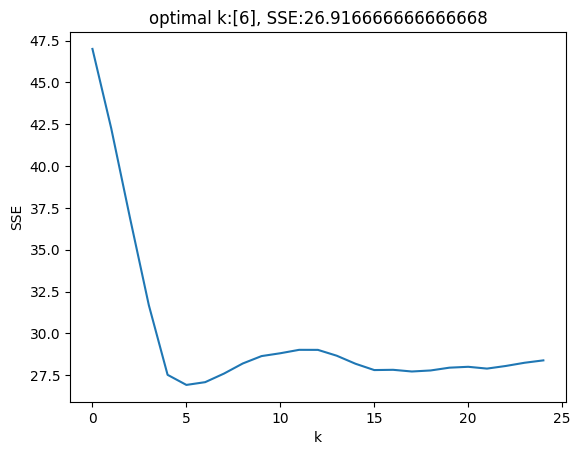

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

[83]


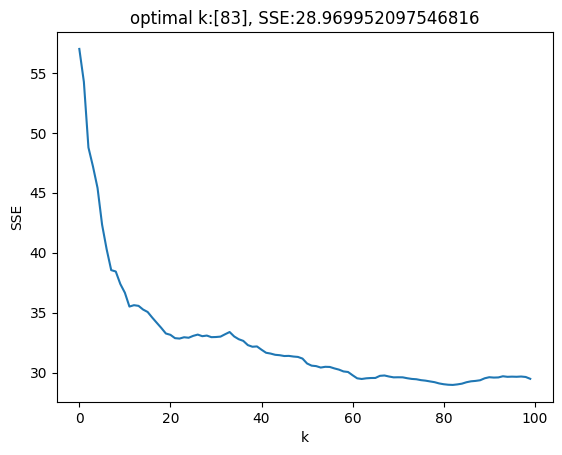

In [27]:
X = df.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

> With more variables, the algorithm selects a higher optimal $k^* = 83$ instead of $k^*=6$, and it has a higher SSE of 29 rather than 27. The simpler model (fewer variables, fewer neighbors) does a better job predicting.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

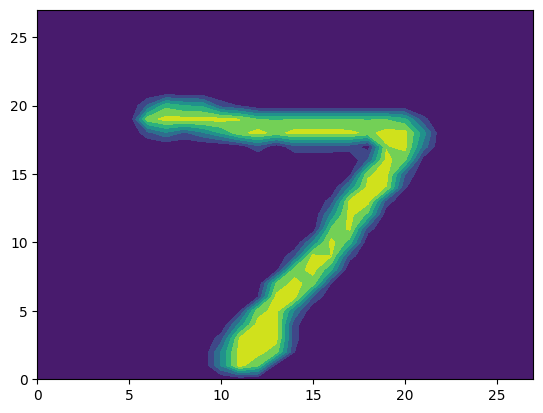

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

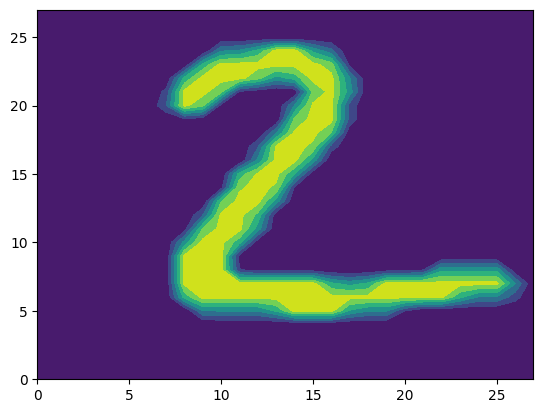

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

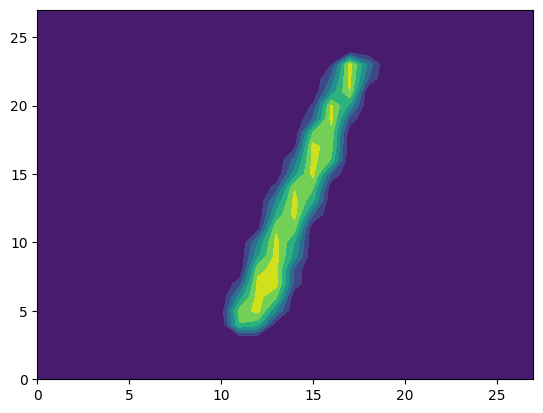

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

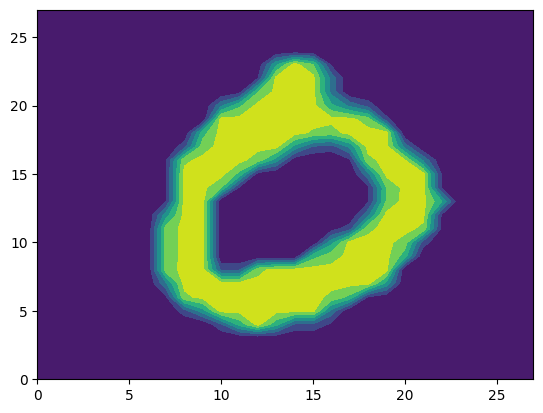

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

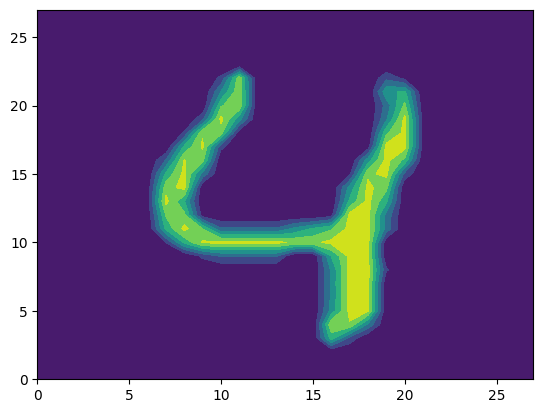

In [28]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?

In [29]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


> There are 60,000 matrices of size 28 by 28 in the training set, and 10,000 matrices of size 28 by 28 in the test set. The y_train vector has 60,000 numeral assignments, and the y_test vector has 10,000 numeral assignments. Basically, each `X_train[i]` is a matrix of values in two-dimensional space, associated with a numeral in `y_train[i]`

3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).

In [30]:
import pandas as pd
import numpy as np

# To save on reloading cost, I save the reshaped data and reload it rather than run the
# code that loops over appending the rows 

reload = 0 # Control the way data loads

if reload == 1:  # If reload is 1, do the reshaping process
    Z_train = []
    for i in range(60000):
        row = X_train[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
        Z_train.append(row[0]) # Append the row vector to the list
    Z_train = pd.DataFrame(Z_train)
    Z_train.to_csv('./data/Z_train.csv')
    #
    Z_test = []
    for i in range(len(y_test)):
        row = X_test[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
        Z_test.append(row[0]) # Append the row vector to the list
    Z_test = pd.DataFrame(Z_test)
    Z_test.to_csv('./data/Z_test.csv')
else: # If reload is not 1, just load the reshaped data
    Z_train = pd.read_csv('./data/Z_train.csv')
    Z_test = pd.read_csv('./data/Z_test.csv')


4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.

[1]


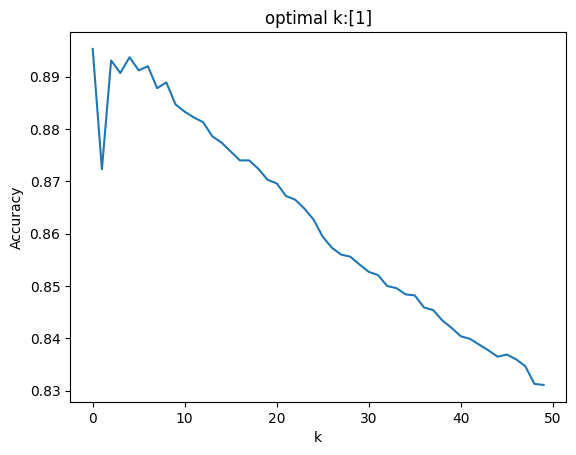

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the optimal k:
k_bar = 50
k_grid = np.arange(1,k_bar) # The range of k's to consider
accuracy = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    predictor = knn.fit(Z_train.values,y_train) 
    #y_hat = predictor.predict(Z_test.values) 
    accuracy[k] = knn.score(Z_test.values,y_test) # Bug in sklearn requires .values

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max) 
k_star = k_grid[max_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('Accuracy')
plt.show()


5. For the optimal number of neighbors, how well does your predictor perform on the test set?

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
predictor = knn.fit(Z_train.values,y_train) 
y_hat = predictor.predict(Z_test.values) 

accuracy = knn.score(Z_test.values,y_test) # Bug in sklearn requires .values
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat)


Accuracy:  0.8931


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,953,1,0,0,0,7,17,2,0,0
1,1,1130,1,2,0,0,1,0,0,0
2,28,70,869,13,3,2,9,28,9,1
3,4,17,16,904,1,23,3,12,20,10
4,3,30,2,1,848,0,8,6,2,82
5,9,19,5,57,12,743,20,3,12,12
6,17,4,0,0,7,3,927,0,0,0
7,0,53,6,2,10,0,0,925,0,32
8,29,23,13,49,10,39,11,12,755,33


> With k=3, the rule is 90% accurate on the test set. When it does make mistakes, it tends to be things like confusing 4 for 9 or 8 for 3 or 7 for 1, which is understandable. It is remarkable that a simple algorithm like kNN does this well at classifying such complex data.

6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

> The current data include an "intensity" for each pixel in the 28$\times$28 grid. To add color, we could have three $28 \times 28$ matrices that each capture the Red, Green, or Blue color intensity. Then we would reshape the three matrices and put them side by side into one long row to create tabular data, like we did above.

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [33]:
# Load data:
df = pd.read_csv('./data/airbnb_hw.csv')

df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

X = df.loc[:,['price','beds','n_reviews','score']]

print(X.shape)
X.describe()

(30478, 4)


,beds,n_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [34]:
# Clean price:
X['price'].value_counts()
X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')
X.describe()

,price,beds,n_reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [35]:
# Clean beds:
X['beds'] = X['beds'].fillna(1)
X.describe()

,price,beds,n_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [36]:
# Clean n_reviews:
# Looks clean

In [37]:
# Clear review_score:
pd.crosstab(df['score'].isnull(), df['n_reviews']>0)

n_reviews,False,True
score,,
False,0,22155
True,7814,509


> So there are 509 true missings, and 7814 missings because there are no reviews. I'm going to drop all of these for this particular clustering exercise. Why? I don't want to impute values and skew the clustering to center around existing average values in the data. If I was doing a different kind of analysis subsequent to this, I would probably have a "new property" dummy and impute the average value to unranked properties using kNN and the rest of the data. Since that means dropping almost 10k observations, I am very tempted to impute with kNN, but let's keep it simple.

In [38]:
X = X.dropna()
X.describe()

,price,beds,n_reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [39]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = X.drop('price',axis=1)
Z = Z.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [40]:
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model for 
model = model.fit(Z) # Fit the emodel
Z['cluster'] = model.labels_

In [41]:
Z.describe()

,beds,n_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.149718
std,0.065205,0.094954,0.110630,1.401749
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

C:\Users\trj2j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


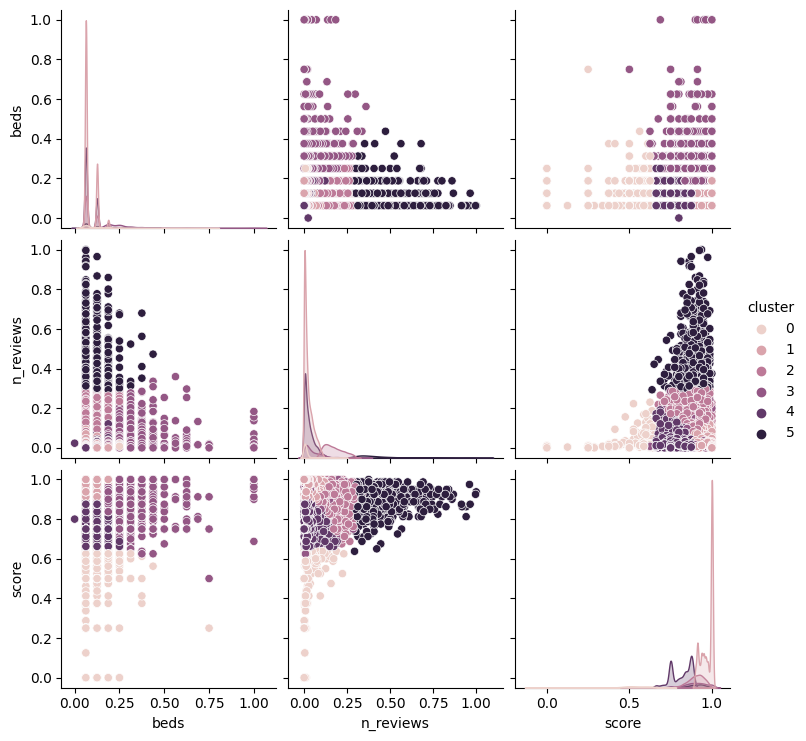

In [42]:
import seaborn as sns
sns.pairplot(data=Z,hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [43]:
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

> Cluster 3 is about $300/night, way more than clusters 0, 4 and 5 at about $130/night. Outliers doesn't even really explain it, since looks at the 25/50/75-percentiles shows that cluster 3 is more expensive across the distribution. Clusters 1 and 2 are a little pricier at $152/night and $141/night.

> This is a useful way to combine methods: Now that we've clustered, we might run more models on the properties in each cluster, bringing in new data. This is a great way to find hidden heterogeneity in your data that isn't labelled but can be teased out with unsupervised learning methods.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

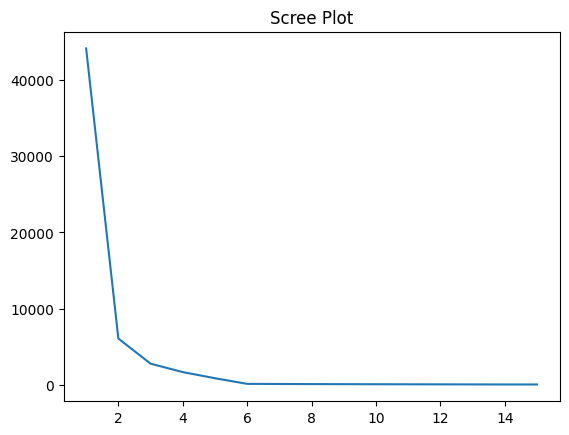

In [44]:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(Z) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot


> A k of 2 or 3 looks pretty good. Let's do 3.

C:\Users\trj2j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        11161.0  151.228743  151.963553  10.0  85.0  129.0  190.0  10000.0
1         6346.0  131.830602  100.510035  20.0  75.0  110.0  169.0   5000.0
2         4648.0  194.677065  184.430237  22.0  99.0  150.0  225.0   4500.0

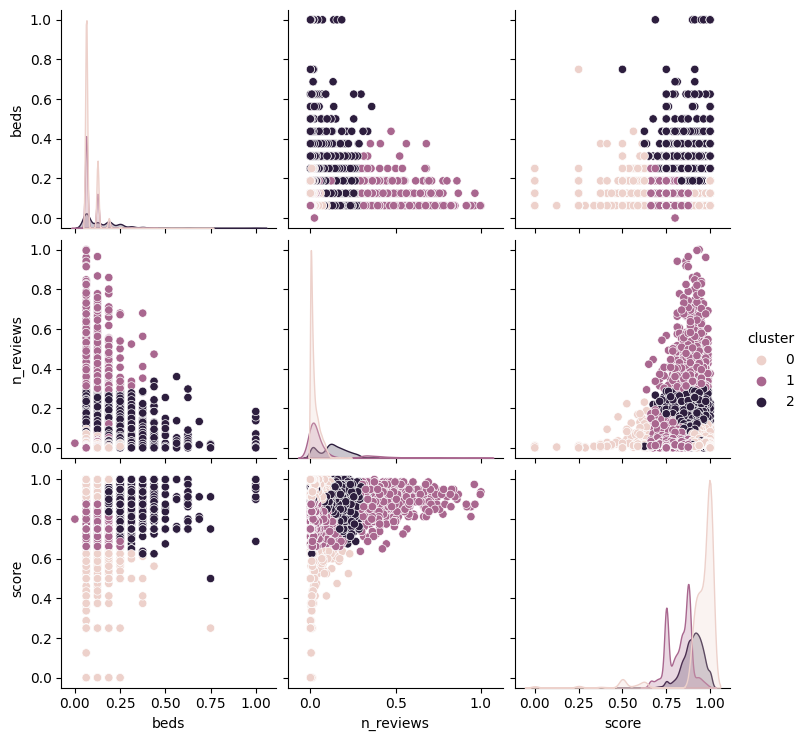

In [45]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for 
model = model.fit(Z) # Fit the emodel
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

> So cluster 2 has a lot of reviews and the reviews are high on average. Cluster 0 has fewer reviews and the reviews are still high, but seems a bit lower on average than cluster 2. Cluster 1 has the fewest reviews and a lot of variation in the reviews posted compared to 0 and 2. Then it's somewhat surprising that cluster 2 has the lowest average price, and cluster 0 and 1 have similar prices. I'd be interested to look at other variables and try to understand what's driving the differences. What kinds of properties are over-represented in cluster 2 relative to 0 and 1?

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

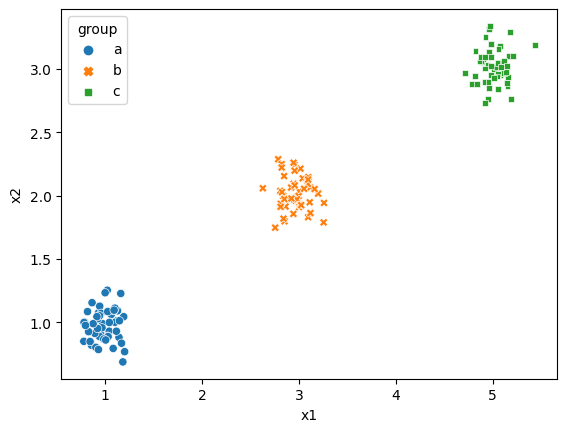

In [47]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

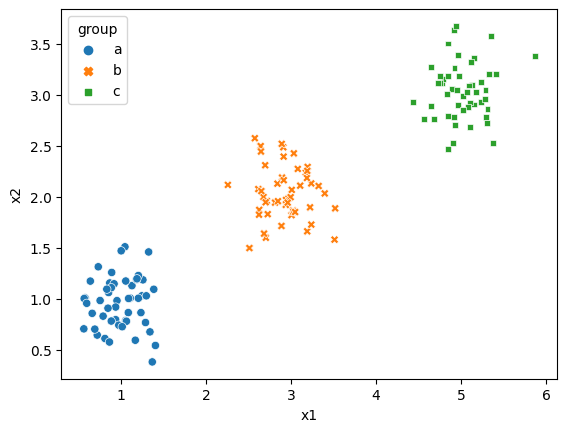

In [48]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

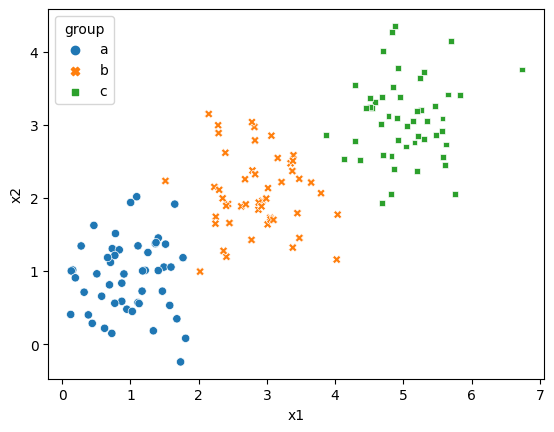

In [49]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

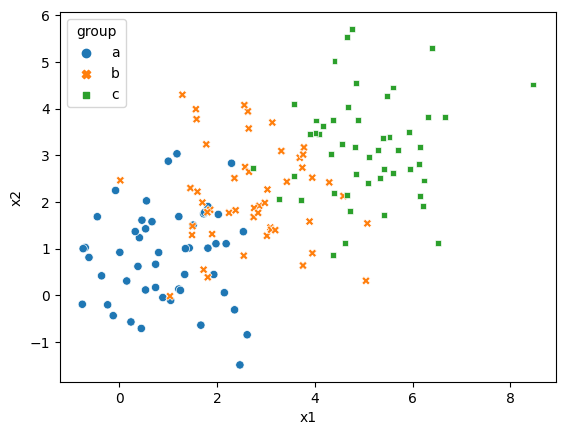

In [50]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

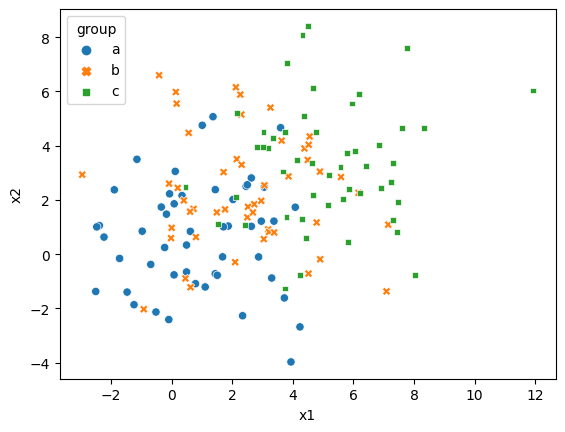

In [51]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

> As the noise goes up, the clusters spread out and collide, until by noise=2.0 it's impossible to guess which cluster a given point belongs to. To me, noise=0.5 is where the distinctness of the clusters first starts to vanish.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

In [52]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data): # I built a function to make scree plots quickly
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

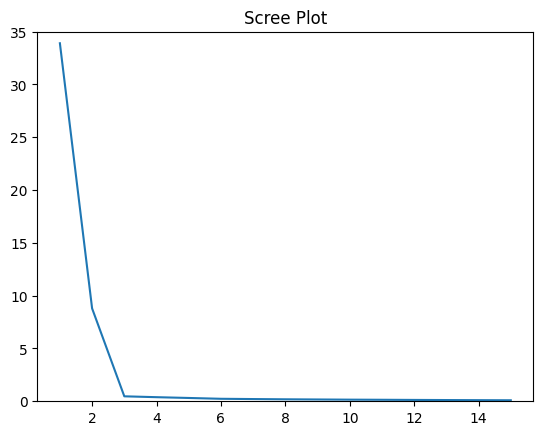

In [53]:
scree( data = df0_125 )

> Obvious elbow at k=3

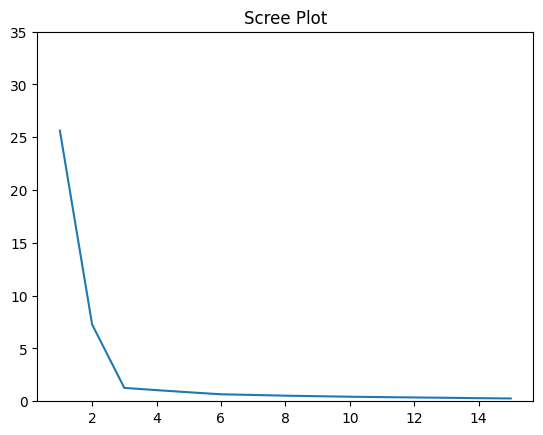

In [54]:
scree( data = df0_25 )

> Obvious elbow at k=3

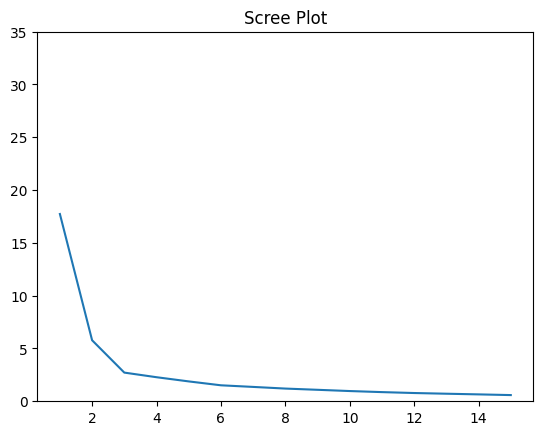

In [55]:
scree( data = df0_5 )

> Pretty obvious elbow at k=3

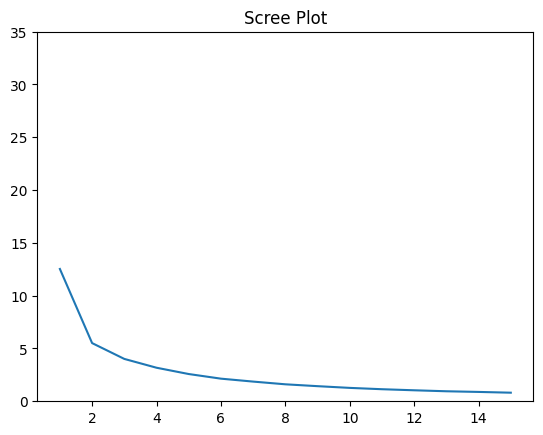

In [56]:
scree( df1_0 )

> Is there an elbow? k=2?

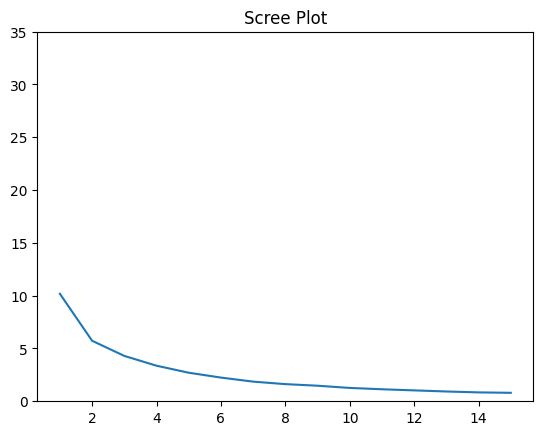

In [57]:
scree( df2_0 )

> Existence or position of an elbow is not obvious.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

> If the groups are separated and distinct, the marginal benefit of an additional cluster is large since you capture a big drop in SSE. As the noise goes up, the groups spread out, and eventually they are visually indistinct. Even though we know that points to the upper right are probably from cluster c and points to the bottom left are probably from cluster a, the significant overlap among groups means it's no longer clear how many groups to pick or which points belong to each. In this case, the clustering may or may not be stable, and isn't really uncovering hidden heterogeneity. So, if there are clusters that are separated and visually distinct, the scree plot approach will work and there will be a distinct elbow; if it's just a cloud of points, the scree plot will be smooth, and the elbow will be indistinct.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

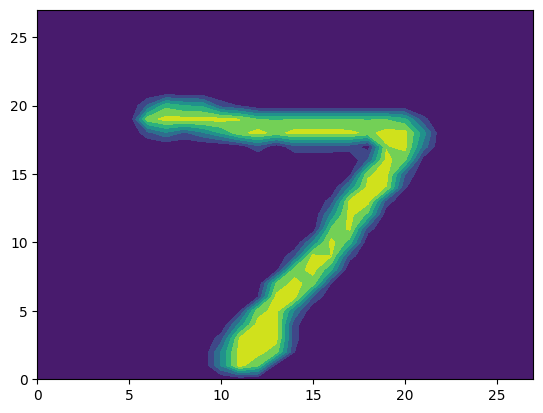

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

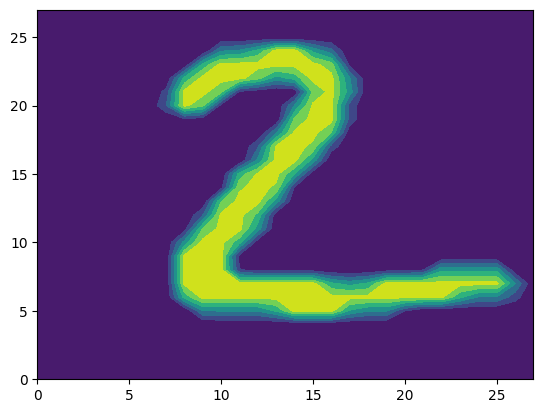

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

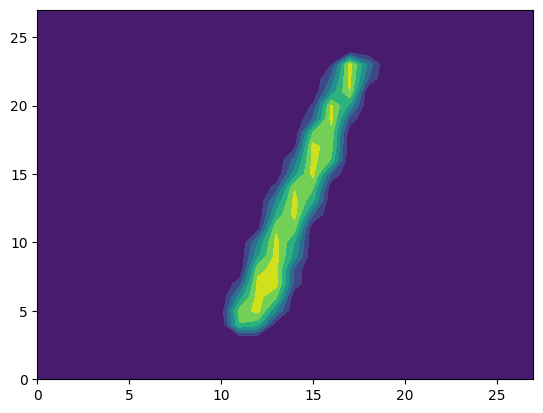

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

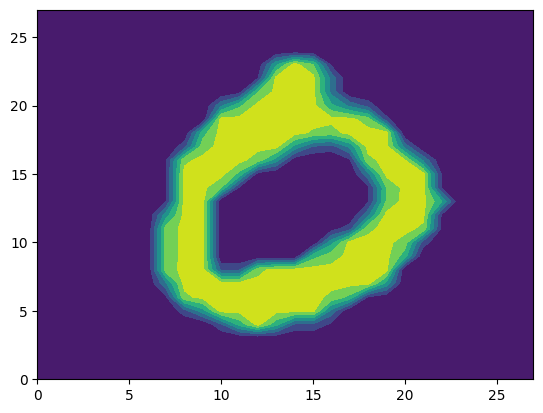

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

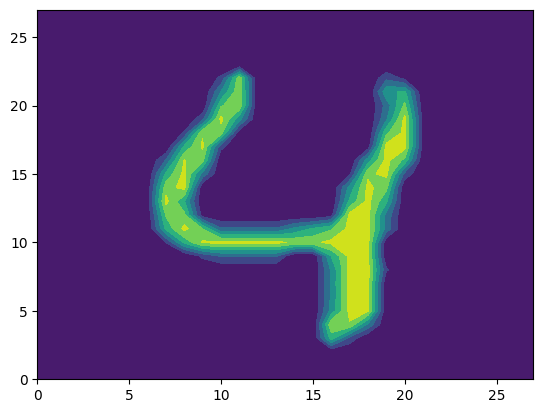

In [58]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?

In [59]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).

> There are 60,000 matrices of size 28 by 28 in the training set, and 10,000 matrices of size 28 by 28 in the test set. The y_train vector has 60,000 numeral assignments, and the y_test vector has 10,000 numeral assignments. Basically, each `X_train[i]` is a matrix of values in two-dimensional space, associated with a numeral in `y_train[i]`

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns 

# To save on reloading cost, I save the reshaped data and reload it rather than run the
# code that loops over appending the rows 

reload = 0 # Control the way data loads to save time on future runs

if reload == 1:  # If reload is 1, do the reshaping process
    Z_train = []
    for i in range(60000):
        row = X_train[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
        Z_train.append(row[0]) # Append the row vector to the list
    Z_train = pd.DataFrame(Z_train)
    Z_train.to_csv('./data/Z_train.csv')
    #
    Z_test = []
    for i in range(len(y_test)):
        row = X_test[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
        Z_test.append(row[0]) # Append the row vector to the list
    Z_test = pd.DataFrame(Z_test)
    Z_test.to_csv('./data/Z_test.csv')
else: # If reload is not 1, just load the reshaped data
    Z_train = pd.read_csv('./data/Z_train.csv')
    Z_test = pd.read_csv('./data/Z_test.csv')


4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  

In [61]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x):
    if np.sum(x)==0:
        return x
    else:
        u = (x-min(x))/(max(x)-min(x))
        return u

U_train = Z_train.apply(maxmin)
U_test = Z_test.apply(maxmin)

model = KMeans(n_clusters=10, n_init=20).fit(U_train)

5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?

In [62]:
y_hat = model.predict(U_test) # Predict values
pd.crosstab(y_test,y_hat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,4,17,0,452,30,3,48,420,2,4
1,468,1,661,0,2,0,2,0,1,0
2,84,28,60,3,25,11,64,20,707,30
3,7,144,73,1,7,7,696,20,40,15
4,36,4,30,1,36,310,0,1,5,559
5,105,275,23,9,20,72,287,42,4,55
6,30,18,28,20,795,1,2,24,18,22
7,58,1,59,1,1,602,0,1,13,292
8,46,586,34,6,10,36,206,12,7,31


> Let's take a look here. What do the clusters likely represent?

> 0: Cluster 3, 7

> 1: Cluster 2, some 0

> 2: Cluster 8

> 3: Cluster 6

> 4: Cluster 9, some 5

> 5: Cluster 1, 6... all over the place

> 6: Cluster 4

> 7: Cluster 5

> 8: Cluster 1, some 6

> 9: Cluster 9 and 5

> So numbers 2, 3, 6, and 7 get clustered reasonably well into 8, 6, 4, and 5. The clustering algorithm has trouble with numbers 0, 1, 5, 7, and 9. In particular, 7 and 9 get mixed together in clusters 4 and 5. It has a really hard time with the number 5. This makes sense, thinking about how the numeric symbols look: 7 and 9 are pretty similar, 5 looks like a lot of other numbers (8, 6, and 3 in particular). 
> It seems to do an OK job. Without the labels, it's surprising it works as well as it does. It's nowhere near the 90% accuracy of the kNN model, though.

6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

Text(0.5, 1.0, 'Scree Plot')

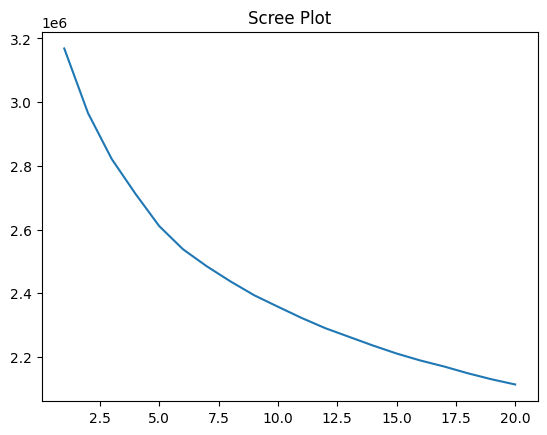

In [63]:
import seaborn as sns
k_bar = 20
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(U_train) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

> That is a rather smooth scree plot. I think going with anything from 5 to 10 is fine, as long as the assignment to clusters is relatively stable (every time you run the code, the same points are assigned, roughly, to the same cluster).